# Nodeflux Intern Assessment Test

---

Merupakan salah satu dari dua tahap **Enrollment Stage** untuk memenuhi syarat sebagai internship Nodeflux.



**Technical Requirements**
Please follow these technical requirements:

1.   Explain each of problem in your own word
2.   Explanation using visualization is a huge plus



# Assessment Test

## (1) Please explain about dataset imbalance and its effect on trained machine learning models

##Jawaban:

Dataset imbalance merupakan suatu kondisi yang biasa ditemukan pada problem klasifikasi, dimana jumlah kelas satu(kelas major) sangat berbeda jauh dibanding kelas lainnya(kelas minor). jika diukur dengan rasio antara kelas major dan kelas minor, misalnya 100:1, 1000:1, 90:10, dsb. Kasus imbalanced dataset tidak hanya ditemukan pada binary classification problem, tapi juga pada multi-class classification problem. contoh kasusnya yaitu fraud detection dan spam filtering.

Saya akan mencoba menjawab effect pada training model yang dilakukan pada imbalanced dataset. contoh dataset yang digunakan yaitu tentang fraud detection pada credit card yang didapatkan dari kaggle. sebelum melakukan training, terlebih dahulu meng-import dataset yang dibutuhkan.

In [4]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download = drive.CreateFile({'id': '1Mz0KbzvrvZ818oyBU6No76RCEwElPagO'}) #ID Dataset yang ada pada drive saya
download.GetContentFile('creditcard.csv.zip')

In [6]:
!pip install zipfile

  Could not find a version that satisfies the requirement zipfile (from versions: )
No matching distribution found for zipfile


In [0]:
#ekstrak dataset zip
import zipfile
zf = zipfile.ZipFile("creditcard.csv.zip")
zf.extractall()

In [0]:
#import library yang dibutuhkan untuk visualisasi dan dataframe
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import datetime
import PIL
%matplotlib inline

In [0]:
df = pd.read_csv("creditcard.csv",header = 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


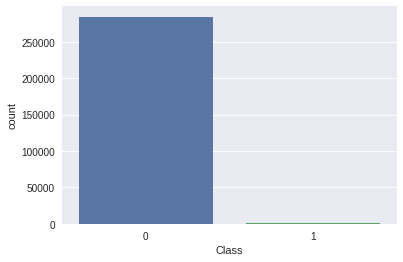

In [12]:
sns.countplot("Class",data=df) #visualisasi data berdasarkan kolom kelas

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# cek persen data imbalanced
jmlKelasNormal = len(df[df["Class"]==0])
jmlKelasFraud = len(df[df["Class"]==1])
print("data kelas normal = ",jmlKelasNormal/(jmlKelasNormal+jmlKelasFraud)*100,"persen")
print("data kelas fraud = ",jmlKelasFraud/(jmlKelasNormal+jmlKelasFraud)*100,"persen")
print("rasio = ",round(jmlKelasNormal/jmlKelasFraud,0), ": 1")

data kelas normal =  99.82725143693798 persen
data kelas fraud =  0.1727485630620034 persen
rasio =  578.0 : 1


Dari hasil pemaparan diatas, jelas terlihat bahwa dataset imbalanced. dengan jumlah kelas major sebanyak 284315 (~99%) dan kelas lainnya (minor) hanya 492(~0.17%). Rasio kedua kelas tersebut yaitu 578 : 1

Lalu bagaimana jika dataset imbalanced tersebut dilakukan training model? Kali ini akan dicoba training model dengan algoritma Logistic Regression yang sangat simpel dengan cross-validation. Kenapa memilih Logistic Regression? Karena hanya terdapat 2 kelas saja dan menurut saya algoritma ini cukup baik dalam mengklasifikasikannya.

In [15]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
model = LogisticRegression()

input_data = df.columns[:-2] #kolom yang digunakan sebagai input sebanyak 30 kolom (tanpa kolom Class)

X = df[input_data]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.90%


Jadi, hasil prediksi modelnya sebesar ~99%, namun apakah hasil yang didapat adalah hasil yang sudah sesuai? untuk mengetahuinya bisa dengan cara melihat isi **y_pred**

In [17]:
subset_of_A = [1]
jmlClassOne = list(filter(lambda x: x in subset_of_A, y_pred))
print(len(jmlClassOne)) #kelas transaksi fraud
jmlClassZero = list(filter(lambda x: x not in subset_of_A, y_pred))
print(len(jmlClassZero)) #kelas transaksi normal

78
56884


Yang menyebabkan hasil akurasi sangat besar ternyata model hampir selalu memprediksi kelas yang bernilai 1, hal itu disebabkan pada saat training model, data yang digunakan untuk proses learning juga lebih condong ke kelas 1(kelas normal), sehingga model yang didapat pada training tidak bagus. itulah efek/dampak ketika melakukan training model pada dataset yang imbalanced, hasil prediksi hampir selalu mengabaikan kelas yg minor.

## (2) In the case of image dataset (E.g. image classification dataset), please explain how to tackle dataset imbalance problem using the following case study :

### a.   You have a training dataset for image classification containing 150 images of truck, 200 images of car, and 10000 images of motorcycle.

##Jawaban:

Ada beberapa cara untuk mengatasi dataset imbalance problem berdasarkan studi kasus diatas, yaitu:

1. **Cari(kumpulkan) lagi dataset untuk gambar truk dan mobil (Image Scraping)**, saya asusikan bahwa kelas truck, car, dan motorcycles hanya kelas umum, maksudnya apapun jenis truk akan termasuk kedalam kelas truck, begitupun dengan car, dan motorcyles. 
Ini tentu akan lebih mudah mendapatkan dataset untuk mengatasi dataset imbalance, karena hanya perlu mengumpulkan gambar-gambar yang termasuk truck, dan car, hingga jumlah gambar yang dikumpulkan dianggap cukup, atau setidaknya persentasi antar ketiga kelas tersebut tidak terlalu berbeda jauh.

2. **Augmentasi Data**, yaitu meningkatkan jumlah training data berdasarkan hanya dengan informasi-informasi yang ada pada training data tersebut. Singkatnya, cara untuk membuat data baru dengan orientasi yang berbeda. Orientasi yang dimaksud yaitu anggap saja seperti saat ingin melakukan edit gambar, bisa dengan melakukan zoom, flip gambar(vertikal/horizontal), rotasi gambar, crop gambar, dll. Jadi, dari satu gambar bisa didapatkan banyak gambar baru dengan variasi yang berbeda.


Saya akan coba mengimplentasikan cara yang pertama dalam mengatasi imbalanced dataset, yaitu mengoleksi lagi gambar-gambar kelas truck dan car. Namun, saya hanya mencoba mengkoleksi data untuk salah satu kelas saja, dan hanya mengkoleksi gambar sejumlah 10 buah saja(untuk kepentingan demonstrasi metode saja). anggap saja mengkoleksi data untuk kedua kelas karena caranya sama.

In [18]:
#proses mengkoleksi data secara secara otomatis/ scraping gambar
!pip install google_images_download

    100% |████████████████████████████████| 911kB 17.6MB/s 
  Running setup.py bdist_wheel for google-images-download ... - done
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [19]:
from google_images_download import google_images_download  

response = google_images_download.googleimagesdownload()

#arguments = {"keywords":"Polar bears,baloons,Beaches","limit":20,"print_urls":True}   #keyword bisa lebih dari 1, disesuaikan dengan kebutuhan
arguments = {"keywords":"car","limit":10,"print_urls":True}   #hanya 1 keyword, dan mengoleksi 10 gambar
paths = response.download(arguments)
print(paths)

#Hasil download gambar bisa dilihat pada tab "Files" pada notebook


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://media.wired.com/photos/5b86fce8900cb57bbfd1e7ee/master/pass/Jaguar_I-PACE_S_Indus-Silver_065.jpg
Completed Image ====> 1. jaguar_i-pace_s_indus-silver_065.jpg
Image URL: https://www.popsci.com/sites/popsci.com/files/styles/1000_1x_/public/images/2018/03/senna.jpg?itok=eYNPMGjA&fc=50,50
Completed Image ====> 2. senna.jpg
Image URL: https://media.wired.com/photos/59bafdf204afdc5248726f5c/master/w_2400,c_limit/BMW-TA.jpg
Completed Image ====> 3. bmw-ta.jpg
Image URL: https://cdn.motor1.com/images/mgl/qxZrL/s3/25-future-cars-worth-waiting-for.jpg
Completed Image ====> 4. 25-future-cars-worth-waiting-for.jpg
Image URL: https://hips.hearstapps.com/hmg-prod/images/2017-honda-civic-si-vs-2018-volkswagen-golf-gti-comparison-test-placement-1524248453.jpg
Completed Image ====> 5. 2017-honda-civic-si-vs-2018-volkswagen-golf-gti-comparison-test-placement-1524248453.jpg
Image URL: https://cdn.vox-cdn.com/uploads/c

Selanjutnya saya akan mengimplementasikan cara yang kedua, yaitu Data Augmentation. biasanya cara ini dilakukan ketika ingin melakukan klasifikasi dengan metode Deep Learning.

In [20]:
!pip install Augmentor

In [21]:
import Augmentor

p = Augmentor.Pipeline("downloads/car")

Initialised with 10 image(s) found.
Output directory set to downloads/car/output.

In [0]:
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.flip_left_right(probability=0.8)
p.flip_top_bottom(probability=0.3)
p.crop_random(probability=1, percentage_area=0.5)
p.resize(probability=1.0, width=120, height=120)

In [23]:
p.sample(100)
#Hasil augmentasi berada di folder downloads/car/output

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x7F8A110B69B0>: 100%|██████████| 100/100 [00:07<00:00, 13.82 Samples/s]


## (3) Please explain the image resolution data (E.g. 720x1080 pixels) impact on deep learning models

##Jawaban:

resolusi gambar berdampak pada beberapa hal dalam deep learning. Karena deep learning bekerja pada gambar pixel by pixel, jika resolusi data gambar besar tentu banyak sekali ciri yang bisa di ektraksi, hasil ekstraksi ciri ini akan mempengaruhi hasil klasifikasi jadi lebih baik. Akan tetapi, resolusi gambar yang besar juga menyebabkan ukuran data juga besar, ini mempengaruhi cpu/gpu dalam memproses gambar untuk melakukan training data. Jika spesifikasi cpu/gpu standar, waktu yang digunakan selama proses training akan sangat lama bahkan tidak mampu melakukan training. Selain itu, dampak menggunakan resolusi gambar yang besar yaitu proses komputasi juga akan lebih berat

## (4) There are two common activation which can be used as output of the deep learning model for classification task ‘softmax’ and ‘sigmoid’. Explain briefly the two activations and give the proper problem example for their usage.

##Jawaban: 

Sigmoid dan Softmax merupakan salah satu fungsi yang keluarannya berupa probabilitas dengan range angka 0-1.

Namun, keduanya terdapat perbedaan. yaitu, pada fungsi softmax, tiap angka probabilitas hasil keluaran berjumlah 1(misal, output softmax = [0.3, 0,5, 0.2] = 1). sedangkan sigmoid tidak.

dalam penerapannya pada metode deep learning khususnya CNN, fungsi softmax biasanya digunakan pada output layer untuk melakukan klasifikasi, karena hasil klasifikasi bisa didapat melalui angka probabilitas yang tertingi. Sedangkan fungsi sigmoid digunakan untuk fungsi aktivasi pada layer konvolusi pada saat proses ekstraksi ciri.


Saya akan mencoba mendemonstrasikan tentang bagaimana fungsi sigmoid dan softmax bekerja, dan apa perbedaan output keduanya, dengan menggunakan dataset iris sebagai inputnya

In [24]:
from sklearn import datasets
np.set_printoptions(precision=3)
iris = datasets.load_iris()
X = iris.data
y = iris.target


def sigmoid(inputs):
    """
    Calculate the sigmoid for the give inputs (array)
    :param inputs:
    :return:
    """
    sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
    return sigmoid_scores

def softmax(inputs):
    """
    Calculate the softmax for the give inputs (array)
    :param inputs:
    :return:
    """
    return np.exp(inputs) / float(sum(np.exp(inputs)))


print ("Hasil keluaran fungsi Sigmoid :: {}".format(sigmoid(X[0])))
print("total nilai probabilitas = ",sum(sigmoid(X[0])))
print ("Hasil keluaran fungsi Softmax :: {}".format(softmax(X[0])))
print("total nilai probabilitas = ",sum(softmax(X[0])))


Hasil keluaran fungsi Sigmoid :: [0.9939401985084158, 0.9706877692486436, 0.8021838885585817, 0.549833997312478]
total nilai probabilitas =  3.316645853628119
Hasil keluaran fungsi Softmax :: [0.81  0.164 0.02  0.006]
total nilai probabilitas =  1.0


Bisa dilihat bahwa output yang didapat dari kedua fungsi diatas, terdapat perbedaan, yaitu nilai probabilitas maksimal pada fungsi softmax adalah 1 sedangkan sigmoid tidak. itulah mengapa fungsi softmax dalam CNN digunakan pada layer output karena hasil klasifikasi melihat dari besarnya nilai probabilitas.

## (5) Please explain in your own word the following hyperparameter of the convolutional layer :

##Jawaban:

### a. Num of Filter

Filter merupakan proses sliding ke semua area dari input image. Setiap sliding dilakukan operasi dot antara input image dan nilai dari filter tersebut. Hasil output dari proses filter dinamakan feature map.

Num of filter adalah jumlah filter pada kernel(convolutional filters). pada contoh dibawah ukuran kernel 3x3, dan num of filternya 3
<img src="https://cdn-images-1.medium.com/max/800/1*vx4znxNS8UaQIy7Exddx_Q.gif" style="width:620;height:440;">

### b. Kernel Size

Kernel pada layer konvolusi yaitu convolutional filter, dalam kata lain, kernel adalah filter itu sendiri.

<img src="https://i.stack.imgur.com/9OZKF.gif" style="width:620;height:440;">

pada gambar diatas, kernel matrix itulah yang disebut kernel. Sedangkan kernel size merujuk kepada ukuran PxL dari kernel
pada contoh diatas, kernel sizenya yaitu 3x3

### c. Strides

Strides merupakan parameter yang menentukan berapa jumlah pergeseran filter terhadap input imagenya. misal stridenya 1, berarti pergeseran filternya sebanyak 1 pixel secara horizontal lalu vertikal.

<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolutional_layer_1/stride1.gif" style="width:620;height:440;">

<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolutional_layer_1/stride2.gif" style="width:620;height:440;">

pada gambar diatas adalah contoh pergeseran filter jika menggunakan strides 1 dan 2

Contoh implementasi pergeseran filter dengan jumlah Strides tertentu:

In [0]:
def get_slice(X, H_start, W_start, H, W):
    """
    Slicing X input in shape of f_size from postition H_start and W_start
    Input:
    - X       : Input data of shape (H, W, C)
    - H_start : height (vertical) position to begin the slicing
    - W_start : width (horizontal) position to begin the slicing
    - H       : height slice
    - W       : width slice
    
    Returns:
    - slices : a slice of data of shape (H, W, C)
    """
    slices = X[H_start:H+H_start,W_start:W+W_start,:]
    
    return slices

In [26]:
#INISIALISASI INPUT IMAGE DAN KERNEL SIZE
np.random.seed(15)
X_int = np.random.randint(0,2,(5,5,1))
print('INPUT IMAGE')
print('X_int =')
print('\n'.join(' '.join(str(cell) for cell in row) for row in X_int[:,:,0]))
print()


f_size = 3 #kernel size


INPUT IMAGE
X_int =
0 1 0 1 1
0 0 1 1 1
1 0 1 1 1
1 1 1 0 0
0 1 0 1 1



input size(N) = 5x5, filter size(F) = 3x3 . Strides=2, maka akan ada 4 kali proses sliding 

dan outputnya(feature map) = 2x2 

Output = ((N-F) / Strides) + 1
= ((5-3)/2) +1 = 1+1 =** 2**


In [27]:
#Strides = 2
stride = 2
output_h = 2
output_w = 2

for h in range(output_h):
    
    print('---')
    for w in range(output_w):
        
        slices = get_slice(X_int, 
                           h*stride, 
                           w*stride, f_size,f_size)
        print('h =',h,',w =',w, ', shape =',slices.shape)
        print('\n'.join(' '.join(str(cell) for cell in row) for row in slices[:,:,0]))
        print()
    


---
h = 0 ,w = 0 , shape = (3, 3, 1)
0 1 0
0 0 1
1 0 1

h = 0 ,w = 1 , shape = (3, 3, 1)
0 1 1
1 1 1
1 1 1

---
h = 1 ,w = 0 , shape = (3, 3, 1)
1 0 1
1 1 1
0 1 0

h = 1 ,w = 1 , shape = (3, 3, 1)
1 1 1
1 0 0
0 1 1



### d. Padding

Padding/Zero Padding merupakan penambahan angka 0 untuk setiap border dari input image. pada contoh dibawah, melakukan padding

<img src="https://image.ibb.co/eYz6dz/PAD.png" style="width:600px;height:400px;">
<caption><center>**Zero-Padding**<br> Image (3 channels, RGB) with a padding of 2. </center></caption>

Contoh implementasi Padding: 

In [0]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
    
    return X_pad

X_rand.shape = (4, 3, 3, 2)
X_rand[1,1] =
 [[ 0.901 -0.684]
 [-0.123 -0.936]
 [-0.268  0.53 ]]


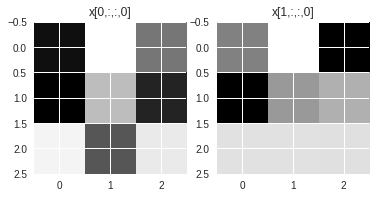

In [29]:
np.random.seed(1)

X_rand = np.random.randn(4, 3, 3, 2)
print ("X_rand.shape =", X_rand.shape)
print ("X_rand[1,1] =\n", X_rand[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x[0,:,:,0]')
axarr[0].imshow(X_rand[0,:,:,0])
axarr[1].set_title('x[1,:,:,0]')
axarr[1].imshow(X_rand[1,:,:,0])
plt.show()

X_rand_pad.shape = (4, 7, 7, 2)
X_rand_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


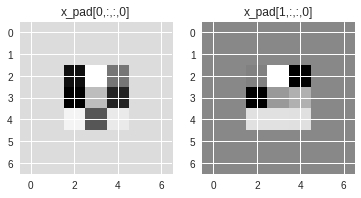

In [30]:
X_rand_pad = zero_pad(X_rand, 2)

print ("X_rand_pad.shape =", X_rand_pad.shape)
print ("X_rand_pad[1,1] =\n", X_rand_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x_pad[0,:,:,0]')
axarr[0].imshow(X_rand_pad[0,:,:,0])
axarr[1].set_title('x_pad[1,:,:,0]')
axarr[1].imshow(X_rand_pad[1,:,:,0])
plt.show()

## (6) Please explain why accuracy is not always the proper method to evaluate classification performance, and can you give other metric which is more proper

Pada problem klasifikasi, sebelum melakukan evaluation metrics, kita harus tahu terlebih dahulu metrics apa yang digunakan untuk evaluasi. seperti contoh ketika mempunyai dataset yang imbalanced, maka tidak bisa menggunakan akurasi untuk menghitung evaluation metrics nya, karena hasil klasifikasi hampir selalu merujuk ke kelas majornya. 

Maka dari itu, ada beberapa evaluation metrics lain yang bisa digunakan untuk dataset imbalanced, yaitu ada Precision, Recall, F1-Score dan Confusion Matrix.

Saya akan mencoba menjelaskan beberapa evaluation metrics yang lebih proper untuk mengatasi problem klasifikasi. dataset yang digunakan adalah breast cancer. http://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [31]:
import numpy as np
import pandas as pd

# Load the dataset into a pandas dataframe
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data",header=None)

# See the data
data.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [32]:
print("Dimensi dataset : {}".format(data.shape))

Dimensi dataset : (286, 10)


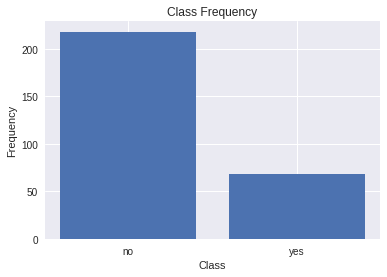

In [33]:
classes = data[9].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

dari hasil plot diatas terlihat bahwa dataset imbalanced, maka untuk melakukan metrics evaluation menggunakan cara lain selain akurasi %

**Confusion Matrix**

Berisi informasi tentang hasil prediksi klasifikasi dan hasil klasifikasi yang sebenarnya.

pada metrics evaluation menggunakan confusion matrix, terdapat 4 istilah sebagai representasi hasil klasifikasi:


1.   *True Positive (TP)* :  jumlah data positif yang terdeteksi dengan benar
2.   *True Negative(TN)* : jumlah data negatif yang terdeteksi dengan benar
3.   *False Positive (FP)* : data negatif namun terdeteksi sebagai data positif
4.   *False Negative(FN)* :  data positif namun terdeteksi sebagai data positif

<center> <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/03/truth_table.png" align="middle"/>
</center>



**Precision**

Hasil hitung True Positives dibagi jumlah True Positives dan False Positives. dalam kata lain angka positive predictions dibagi  total angka yang prediksi kelasnya positif.

Precision = TP / (TP + FP)

**Recall**

Hasil True Positives dibagi jumlah True Positives dan False Negatives. dalam kata lain, positive predictions dibagi nilai positive class pada data test. biasa disebut Sesitivity.

Recall = TP / (TP + FN)

**F1 Score**

F1 Score menghitung balance antara precision dan recall. F1 Score dibilang baik kalau jumlah FP dan FN memiliki jumlah yang tidak jauh berbeda. jika FP dan FN berbeda jauh, lebih baik menggunakan precision dan recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)




## (7) Please explain what is embedding (such as word embedding, face embedding)

##Jawaban:

Embedding merupakan proses merepresentasikan data non-numerik menjadi numerik agar mesin dapat memproses data. salah satu contohnya ada Word Embedding. sederhananya, adalah mengubah teks menjadi angka. transformasi ini penting karena algortima-algoritma ML/DL membutuhkan masukan berupa angka/vektor untuk selanjutnya diproses.

Word Embedding mampu menangkap konteks kata dalam dokumen, kesamaan semantik dan sintaksis, hubungan dengan kata lain, dll. salah satu penggunaan Word Embedding adalah pada saat melakukan Sentiment Analysis.

kali ini saya akan mencoba mengimplementasikan word embedding sederhana dalam mencari kata yang similiar terhadap kata lainnya:

In [34]:
import nltk
nltk.download('brown')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [36]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 15.0MB/s 
    100% |████████████████████████████████| 133kB 28.1MB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
    100% |████████████████████████████████| 5.1MB 6.5MB/s 
    100% |████████████████████████████████| 552kB 25.5MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [37]:
from nltk.corpus import brown
from gensim.models import Word2Vec
 
print(brown.sents())
w2v_model = Word2Vec(brown.sents(), size=128, window=5, min_count=3, workers=4)
 

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [38]:
# # Getting the vector for a word
w2v_model.wv['Italy'] 
w2v_model.wv['France']
 
# Getting most similar vectors
print(w2v_model.wv.most_similar('Paris'))


[('Italy', 0.9750930070877075), ('Rome', 0.9638924598693848), ('Eugene', 0.962485671043396), ('France', 0.9622681140899658), ('headquarters', 0.961513102054596), ('breakfast', 0.9606647491455078), ('London', 0.9598265886306763), ('Harvard', 0.9594094157218933), ('dancing', 0.9588642120361328), ('Barre', 0.9587556719779968)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## (8) (Case Study) You want to make a classification model from a huge dataset which the training dataset is 100GB, the validation data is 20GB and your training device only have 16GB of RAM. Design your approach using flowchart on how to handle those problem as efficient as possible (Pseudocode is accepted and any of deep learning framework is also acceptable)

<img src="https://i.ibb.co/85GHvvq/Approach.png" alt="Approach" style="width:780px;height:1200px;">

untuk ukuran original bisa dilihat di <a href="https://drive.google.com/open?id=1FBJYFXjlExZQc2NsWbGVJzAGJT5hMiOr">Gambar Original</a>


Sedikit penjelasan:

pendekatan yang saya lakukan terbagi menjadi 2 tahap, yaitu lokal pc yang bertujuan untuk membangun model dan memastikan bahwa algoritma sudah benar-benar berjalan. lalu performa yang sebenarnya dengan bantuan google colab(cloud) untuk membantu proses training yang lebih cepat, karena colab memberikan bantuan GPU gratis sebesar 11GB + 16GB RAM kita, sehingga dapat melakukan training model pada data yang lebih besar dibanding data yang ditraining di pc lokal. 